<a href="https://colab.research.google.com/github/Naveenkumar-The-magician/Recommender-systems/blob/main/Book_recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
import os
Root = "/content/drive/MyDrive/dataset/recommender_system_dataset"
os.chdir(Root)

In [29]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [30]:
# Load data
books = pd.read_csv("/content/drive/MyDrive/dataset/recommender_system_dataset/Books.csv")
users = pd.read_csv("/content/drive/MyDrive/dataset/recommender_system_dataset/Users.csv")
ratings = pd.read_csv("/content/drive/MyDrive/dataset/recommender_system_dataset/Ratings.csv")

In [31]:
print(ratings.columns)

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')


Exploratory data analysis (EDA)

In [32]:
#books
print('shape of books ',books.shape)
print()
books.info()

shape of books  (271360, 8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [33]:
# user
print('shape of users',users.shape)
print()
users.info()

shape of users (278858, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [34]:
# ratings
print('shape of rating',ratings.shape)
print()
ratings.info()

shape of rating (1149780, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


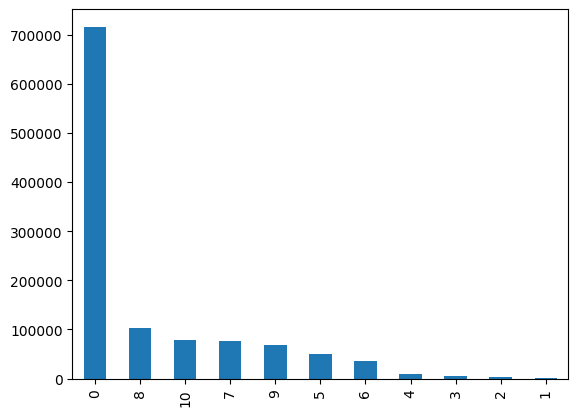

In [35]:
ratings['Book-Rating'].value_counts().plot(kind='bar');

In [36]:
# find the null value in books dataset
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [37]:
# drop the missing values
books.dropna(inplace=True)

In [38]:
# dupilcated value
books.duplicated().sum()

0

In [39]:
books['Year-Of-Publication'].value_counts().index.values

array([2002, 2001, 1999, 2000, 1998, 2003, 1997, 1996, 1995, 1994, 1993,
       1992, 1991, 1990, 1989, 1988, 1987, 2004, 1986, '1999', 1985,
       '2000', '2002', '1998', '2001', 1984, 0, '1997', '1996', 1983,
       '1995', 1982, '1994', '2003', '1993', '1992', '1991', 1981, '1990',
       '1989', '1988', 1980, '1987', '1986', 1979, 1978, '1985', 1977,
       '1984', '2004', '1983', 1976, '1982', '0', '1981', 1975, '1980',
       1974, '1979', 1973, '1978', 1972, '1977', '1976', '1975', 1971,
       '1974', 1970, '1973', 1969, '1972', '1971', 1968, '1970', 1966,
       1967, 1965, 1964, '1969', 1963, 1960, 1961, 1962, 1959, '1968',
       1958, 1957, '1965', 1953, 1955, '1960', 1956, '1961', 1954, '1966',
       '1962', '1967', '1963', '1964', 1951, 2005, 1940, '1959', '1956',
       1920, '1957', '1955', 1952, 1950, '1958', '2005', '1953', 1942,
       1930, 1946, '1952', 1947, 1911, '1911', '1951', '1950', 1949, 1941,
       '1940', '1954', 1923, 1939, 1901, 1929, 1938, 1948, 1943

In [40]:
# Step 1: Filter out invalid or non-year values
valid_years = books['Year-Of-Publication'].astype(str).str.isnumeric()
books = books[valid_years]

# Step 2: Convert the column data to integers
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(int)

# Step 3: Create a new datetime column from the integers representing years
books['Publication_Date'] = pd.to_datetime(books['Year-Of-Publication'], format='%Y', errors='coerce')

# Drop the old 'Year-Of-Publication' column if you don't need it anymore
books.drop(columns=['Year-Of-Publication'], inplace=True)

# Display the DataFrame to check the new datetime column
books = pd.DataFrame(books)

In [41]:
# Step 4: Create a new column with only the year part as integers
books['Year-Of-Publication'] = books['Publication_Date'].dt.year

In [42]:
books['Year-Of-Publication'].value_counts().index.values

array([2002., 1999., 2001., 2000., 1998., 1997., 2003., 1996., 1995.,
       1994., 1993., 1992., 1991., 1990., 1989., 1988., 1987., 1986.,
       2004., 1985., 1984., 1983., 1982., 1981., 1980., 1979., 1978.,
       1977., 1976., 1975., 1974., 1973., 1972., 1971., 1970., 1969.,
       1968., 1966., 1967., 1965., 1964., 1960., 1961., 1963., 1962.,
       1959., 1958., 1957., 1956., 1955., 1953., 1954., 2005., 1951.,
       1940., 1952., 1920., 1950., 1911., 1942., 1947., 1946., 1930.,
       1949., 1923., 1941., 1939., 1948., 1945., 1943., 1901., 1938.,
       2030., 1936., 1929., 1937., 1932., 1944., 1933., 1935., 2006.,
       1900., 1931., 2020., 1927., 1921., 1922., 1909., 2011., 1925.,
       1926., 2010., 1924., 1902., 2050., 1928., 1904., 2012., 2024.,
       1897., 1919., 2008., 1934., 1910., 1806., 2021., 2038., 1906.,
       1908., 1914., 1917., 2026., 2037.])

In [43]:
# this all the invalid data at this time

books = books[~(books['Year-Of-Publication'] == 2037)]
books = books[~(books['Year-Of-Publication'] == 2026)]
books = books[~(books['Year-Of-Publication'] == 2030)]
books = books[~(books['Year-Of-Publication'] == 2050)]
books = books[~(books['Year-Of-Publication'] == 2038)]

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as w
w.filterwarnings('ignore')
from sklearn.metrics.pairwise import cosine_similarity

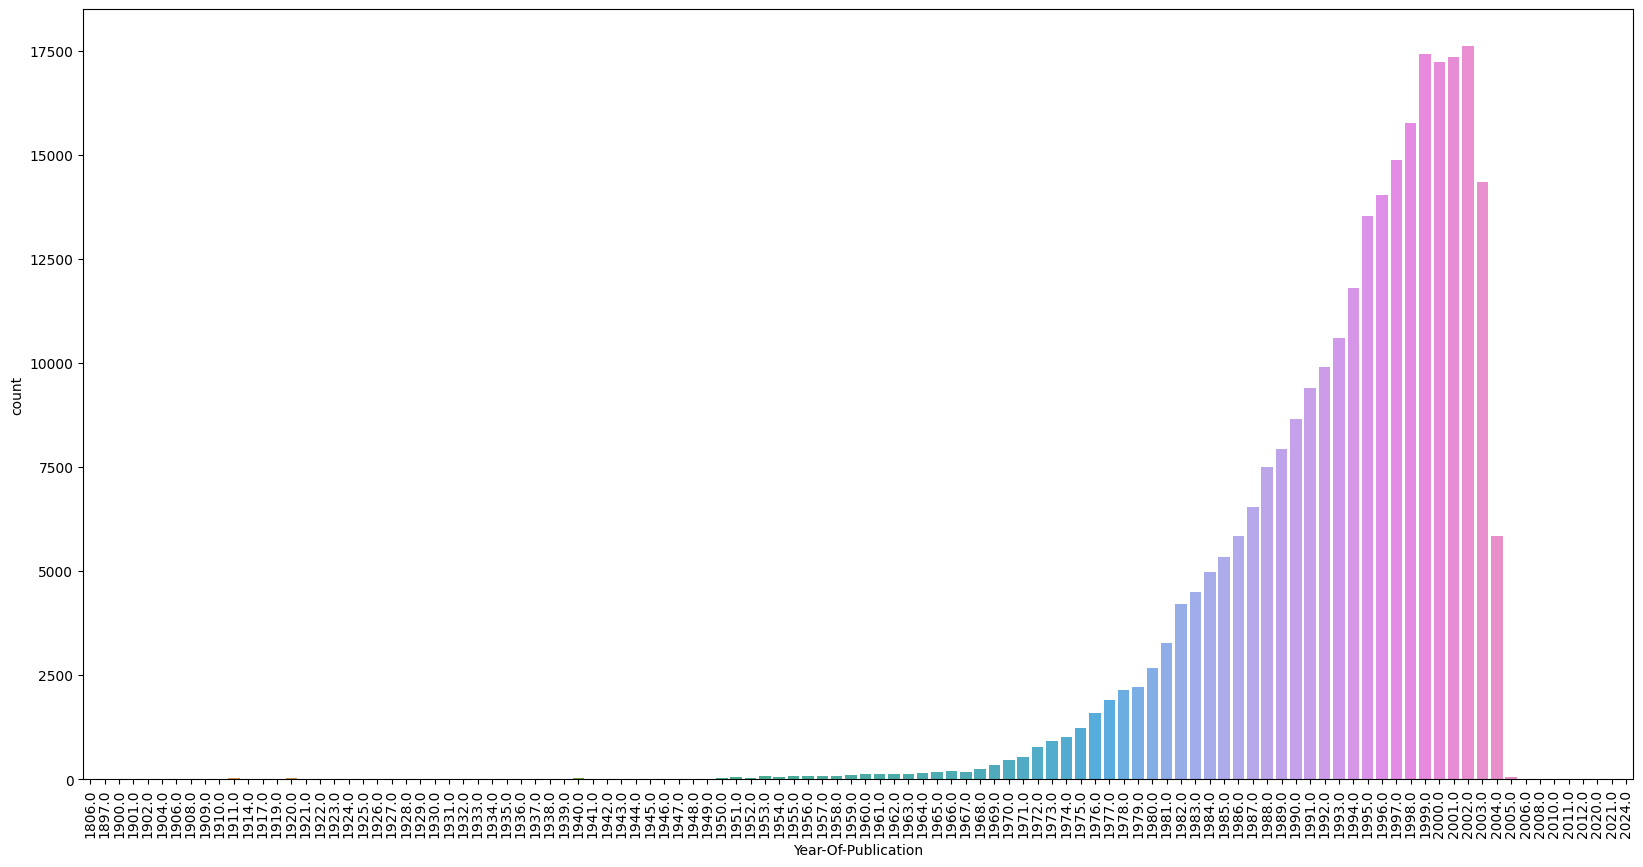

In [45]:
plt.figure(figsize=(20,10))
sns.countplot(x=books['Year-Of-Publication']);
plt.xticks(rotation=90)
plt.show()

<Axes: >

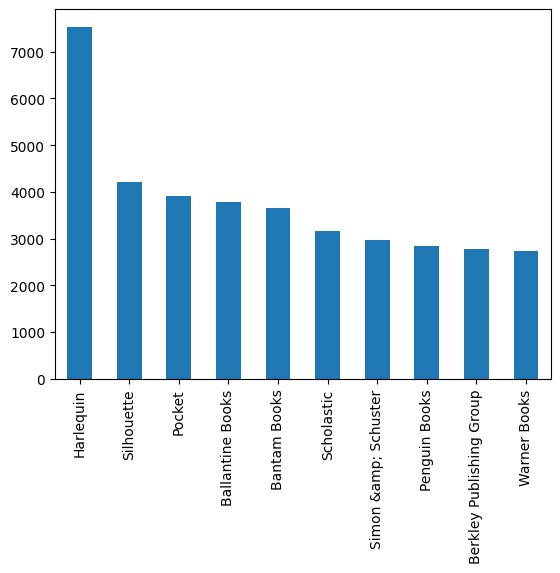

In [46]:
# top 10 Publisher
books['Publisher'].value_counts().head(10).plot(kind='bar')

In [47]:
# find the null values
round(100*(users.isnull().sum()/len(users.index)),2)

User-ID      0.00
Location     0.00
Age         39.72
dtype: float64

In [48]:
# remove the age column
users.drop('Age',axis=1,inplace=True)

In [49]:
users['Location'] = users['Location'].apply(lambda x:x.split(',')[-1])

<Axes: >

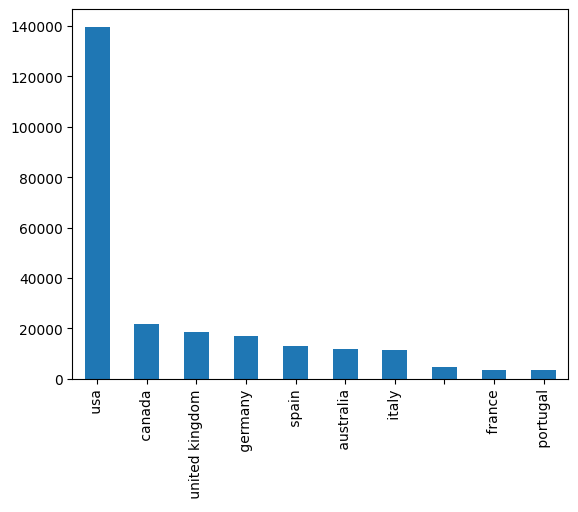

In [50]:
# top 10 user location
users['Location'].value_counts().head(10).plot(kind='bar')

In [51]:
# null values
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [52]:
# duplicate values
ratings.duplicated().sum()

0

Popularity based recomender system

In [53]:
# merge the data ratings and books based on 'ISBN' columns

rating_books_name = ratings.merge(books,on='ISBN')

In [54]:
# first of all groupby 'Book-Title' and find the totle number(count) of voting
numer_rating = rating_books_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
numer_rating.rename(columns={'Book-Rating':'Totle_number_rating'},inplace=True)
numer_rating.head()

,Book-Title,Totle_number_rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


In [55]:
# totle avg-rating
avg_rating = rating_books_name.groupby('Book-Title')['Book-Rating'].mean().reset_index()
avg_rating.rename(columns={'Book-Rating':'Totle_avg_rating'},inplace=True)
avg_rating.head()

,Book-Title,Totle_avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.25
1,Always Have Popsicles,0.00
2,Apple Magic (The Collector's series),0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.00
4,Beyond IBM: Leadership Marketing and Finance ...,0.00


In [56]:
# merge the 'avg_rating' and 'number_rating' base on 'Book-Title'

popular_df = numer_rating.merge(avg_rating,on='Book-Title')
popular_df.head()

,Book-Title,Totle_number_rating,Totle_avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.25
1,Always Have Popsicles,1,0.00
2,Apple Magic (The Collector's series),1,0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.00
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.00


In [57]:
popular_df = popular_df[popular_df['Totle_number_rating'] >= 250].sort_values('Totle_avg_rating',ascending=False).head(50)
popular_df.head()

,Book-Title,Totle_number_rating,Totle_avg_rating
80426,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80414,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80433,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80418,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80406,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453


In [58]:
#  many columns fetch the books dataset to show the website to help
# merge the 'popular_df' and 'books' dataset
# Books-Title have many duplicated values
# drop_duplicated
popular_df = popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author', 'Image-URL-M', 'Totle_number_rating','Totle_avg_rating']]
popular_df.head()

,Book-Title,Book-Author,Image-URL-M,Totle_number_rating,Totle_avg_rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.183453


In [59]:
# this all the top 50 Books
popular_df.head()

,Book-Title,Book-Author,Image-URL-M,Totle_number_rating,Totle_avg_rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.183453


Collaborative Filtering Based Recommender System

In [60]:
x = ratings['User-ID'].value_counts() > 200
y = x[x].index

In [61]:
print(y.shape)

(899,)


In [62]:
ratings = ratings[ratings['User-ID'].isin(y)]

In [63]:
rating_with_books = ratings.merge(books, on='ISBN')
rating_with_books.head(2)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Publication_Date,Year-Of-Publication
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,1994-01-01,1994.0
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,1994-01-01,1994.0


In [64]:
number_rating = rating_with_books.groupby('Book-Title')['Book-Rating'].count().reset_index()
number_rating.rename(columns= {'Book-Rating':'number_of_ratings'}, inplace=True)
number_rating.head()

,Book-Title,number_of_ratings
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [65]:
final_rating = rating_with_books.merge(number_rating, on='Book-Title')

In [66]:
final_rating = final_rating[final_rating['number_of_ratings'] >= 50]
final_rating.drop_duplicates(['User-ID','Book-Title'], inplace=True)

In [67]:
book_pivot = final_rating.pivot_table(columns='User-ID', index='Book-Title', values="Book-Rating")
book_pivot.fillna(0, inplace=True)

In [68]:
book_pivot

User-ID,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Modeling

In [69]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_scores = cosine_similarity(book_pivot)

In [70]:
similarity_scores

array([[1.        , 0.07624004, 0.        , ..., 0.09387814, 0.04480685,
        0.03286937],
       [0.07624004, 1.        , 0.27421749, ..., 0.07424784, 0.16365457,
        0.15050832],
       [0.        , 0.27421749, 1.        , ..., 0.04732923, 0.05195619,
        0.11178963],
       ...,
       [0.09387814, 0.07424784, 0.04732923, ..., 1.        , 0.07085128,
        0.03898126],
       [0.04480685, 0.16365457, 0.05195619, ..., 0.07085128, 1.        ,
        0.13208788],
       [0.03286937, 0.15050832, 0.11178963, ..., 0.03898126, 0.13208788,
        1.        ]])

In [71]:
similarity_scores.shape

(742, 742)

In [72]:
# this is the first books distance each books similarity
similarity_scores[0]

array([1.        , 0.07624004, 0.        , 0.        , 0.07311041,
       0.03592254, 0.        , 0.0720444 , 0.09844858, 0.        ,
       0.        , 0.        , 0.06357987, 0.        , 0.06052731,
       0.0184244 , 0.0631735 , 0.09360361, 0.04554309, 0.08528621,
       0.02292759, 0.        , 0.08992788, 0.        , 0.12558027,
       0.07016405, 0.05554746, 0.06322522, 0.        , 0.04925827,
       0.10706361, 0.0571246 , 0.10238571, 0.06000764, 0.05101252,
       0.        , 0.        , 0.06576001, 0.03915011, 0.        ,
       0.        , 0.09079097, 0.07599253, 0.        , 0.        ,
       0.05612309, 0.10585073, 0.        , 0.03106666, 0.07276544,
       0.06663565, 0.07310003, 0.02892988, 0.04970874, 0.26347625,
       0.10084817, 0.08304715, 0.10808221, 0.10651024, 0.06877653,
       0.03882237, 0.        , 0.        , 0.03512102, 0.        ,
       0.05326136, 0.0338294 , 0.17941454, 0.        , 0.        ,
       0.        , 0.03714664, 0.09521457, 0.12490485, 0.     

In [73]:
def recommend(book_name):
    # index fetch
    index = np.where(book_pivot.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:5]

    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['Book-Title'] == book_pivot.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))

        data.append(item)

    return data

In [74]:
recommend('Harry Potter and the Chamber of Secrets (Book 2)')

[['Harry Potter and the Prisoner of Azkaban (Book 3)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'],
 ['Harry Potter and the Goblet of Fire (Book 4)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0439139597.01.MZZZZZZZ.jpg'],
 ["Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))",
  'J. K. Rowling',
  'http://images.amazon.com/images/P/059035342X.01.MZZZZZZZ.jpg'],
 ["Harry Potter and the Sorcerer's Stone (Book 1)",
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0590353403.01.MZZZZZZZ.jpg']]

A recommendation system using the Random Forest algorithm

In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
books = pd.read_csv("/content/drive/MyDrive/dataset/recommender_system_dataset/Books.csv", encoding="latin1")
users = pd.read_csv("/content/drive/MyDrive/dataset/recommender_system_dataset/Users.csv", encoding="latin1")
ratings = pd.read_csv("/content/drive/MyDrive/dataset/recommender_system_dataset/Ratings.csv", encoding="latin1")


In [77]:
# Merge the data
data = pd.merge(ratings, users, on="User-ID", how="inner")
data = pd.merge(data, books, on="ISBN", how="inner")

# Handle missing values (if any)
data = data.dropna()

# Encode categorical features (e.g., Location)
data["Location"] = pd.factorize(data["Location"])[0]

# Select relevant features
X = data[["User-ID", "Location", "Age"]]
y = data["Book-Rating"]

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [79]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [80]:
y_pred = rf_model.predict(X_test)

Mean Squared Error: 11.581405202245334


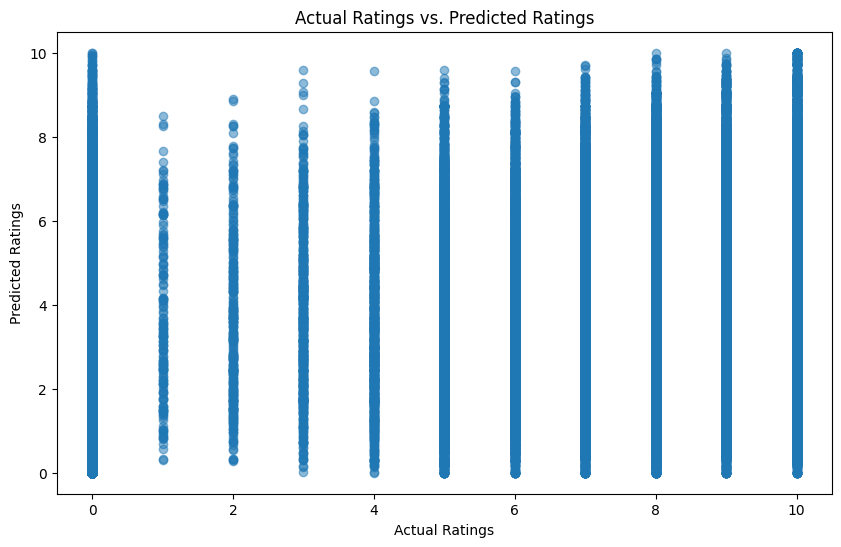

In [81]:
# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Visualize predicted vs. actual ratings
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual Ratings vs. Predicted Ratings")
plt.show()

In [82]:

def recommend_books(user_id, num_recommendations=10):
    if user_id not in data["User-ID"].unique():
        return "User not found in the dataset."

    # Filter books that the user has not rated
    user_rated_books = data[data["User-ID"] == user_id]["ISBN"]
    books_to_recommend = data[~data["ISBN"].isin(user_rated_books)]

    if books_to_recommend.empty:
        return "User has rated all books in the dataset."

    # Predict ratings for the remaining books
    user_data = pd.DataFrame({"User-ID": [user_id] * len(books_to_recommend),
                              "Location": [data[data["User-ID"] == user_id]["Location"].values[0]] * len(books_to_recommend),
                              "Age": [data[data["User-ID"] == user_id]["Age"].values[0]] * len(books_to_recommend)})
    predicted_ratings = rf_model.predict(user_data)

    # Add predicted ratings to the books
    books_to_recommend["Predicted_Rating"] = predicted_ratings

    # Sort books by predicted rating
    recommended_books = books_to_recommend.sort_values(by="Predicted_Rating", ascending=False)

    return recommended_books[["ISBN", "Book-Title", "Book-Author", "Year-Of-Publication"]].head(num_recommendations)

# Example: Recommend top 10 books for a user with User-ID 276729
user_id = 276729
recommended_books = recommend_books(user_id)
print(recommended_books)

              ISBN                                         Book-Title  \
1       034545104X                               Flesh Tones: A Novel   
701409  0373520018  Wanted: Perfect Partner (Yours Truly #1) (Silh...   
701412  0373707037   Under One Roof (Harlequin Superromance, No. 703)   
701413  0373707037   Under One Roof (Harlequin Superromance, No. 703)   
701414  0373707037   Under One Roof (Harlequin Superromance, No. 703)   
701415  0373707037   Under One Roof (Harlequin Superromance, No. 703)   
701416  0373707037   Under One Roof (Harlequin Superromance, No. 703)   
701417  0373710852  Montana Dreaming  (Home On The Ranch) (Harlequ...   
701419  0373710852  Montana Dreaming  (Home On The Ranch) (Harlequ...   
701420  0373710852  Montana Dreaming  (Home On The Ranch) (Harlequ...   

            Book-Author Year-Of-Publication  
1            M. J. Rose                2002  
701409  Debbie MacOmber                1995  
701412  Shannon Waverly                1996  
701413  Shan

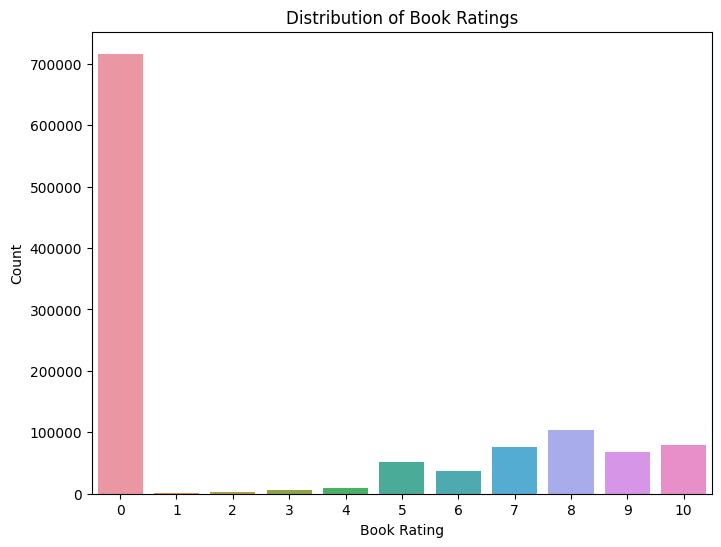

In [83]:
# Data Exploration
# Visualization 1: Distribution of Book Ratings
plt.figure(figsize=(8, 6))
sns.countplot(x='Book-Rating', data=ratings)
plt.title('Distribution of Book Ratings')
plt.xlabel('Book Rating')
plt.ylabel('Count')
plt.show()

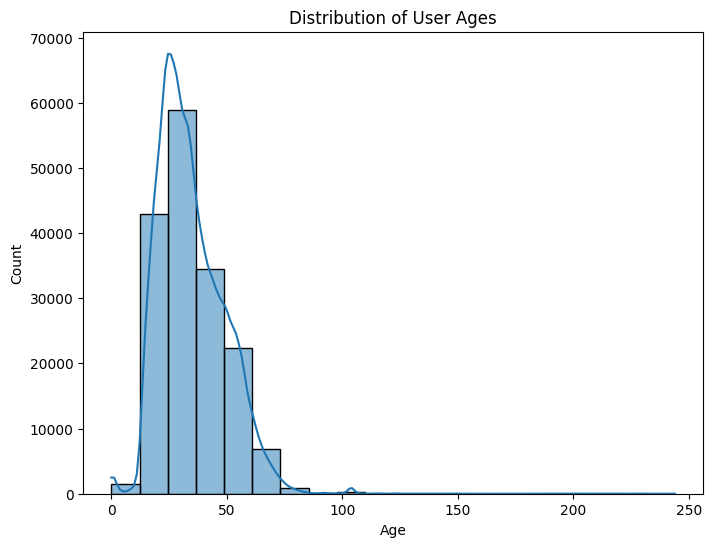

In [84]:
# Visualization 2: Distribution of User Ages
plt.figure(figsize=(8, 6))
sns.histplot(users['Age'], bins=20, kde=True)
plt.title('Distribution of User Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

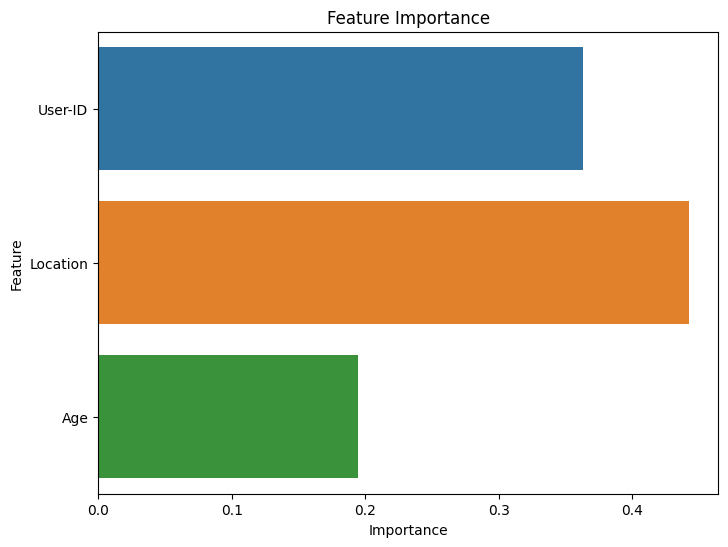

In [85]:
# Visualization 4: Feature Importance
feature_importance = rf_model.feature_importances_
features = X_train.columns
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importance, y=features)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [86]:

!pip install wordcloud

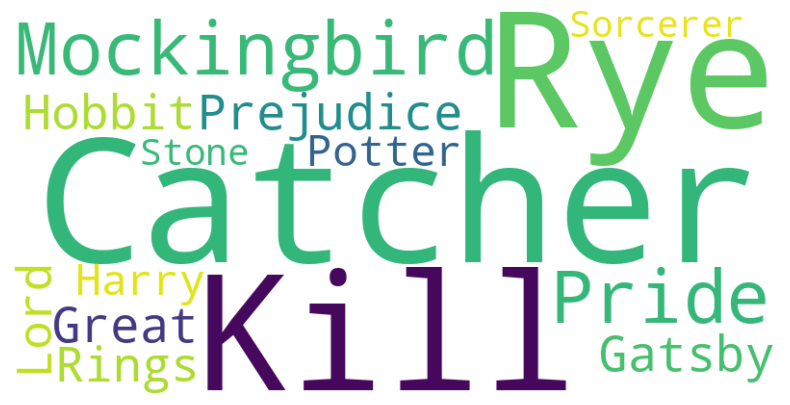

In [87]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Sample list of book titles (replace with your data)
book_titles = [
    "The Catcher in the Rye", "To Kill a Mockingbird", "1984",
    "Pride and Prejudice", "The Great Gatsby", "The Hobbit",
    "The Lord of the Rings", "Harry Potter and the Sorcerer's Stone"
]

# Convert the list of titles to a string
text = " ".join(book_titles)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide axis
plt.show()

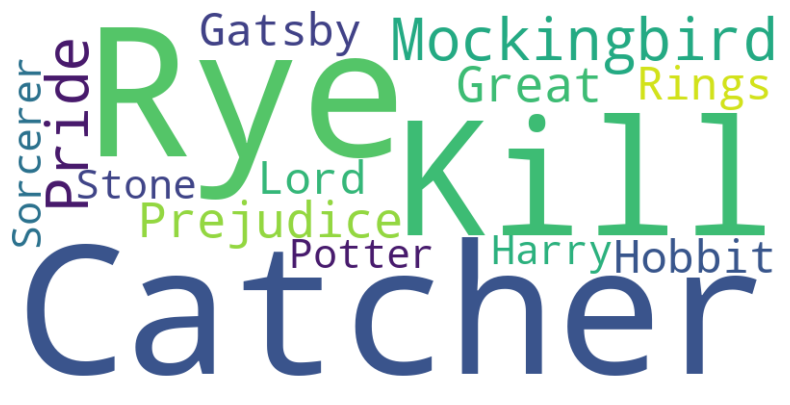

In [88]:

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Sample list of recommended book titles (replace with your data)
recommended_books = [
    "The Catcher in the Rye", "To Kill a Mockingbird", "1984",
    "Pride and Prejudice", "The Great Gatsby", "The Hobbit",
    "The Lord of the Rings", "Harry Potter and the Sorcerer's Stone"
]

# Convert the list of recommended book titles to a string
recommended_books_text = " ".join(recommended_books)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(recommended_books_text)

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide axis
plt.show()